<a href="https://colab.research.google.com/github/yangchangnaihoby/python/blob/master/Day_021_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('/content/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2022-05-24 06:44:45--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-24 06:44:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-24 06:44:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1) :
  n = len(arr)
  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)
  for i in range(rows) :
    for j in range(cols) :
      if i * 10 + j < n :
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

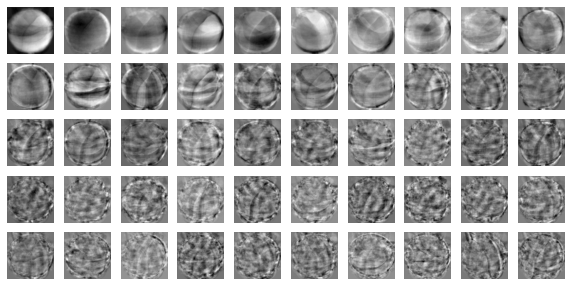

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


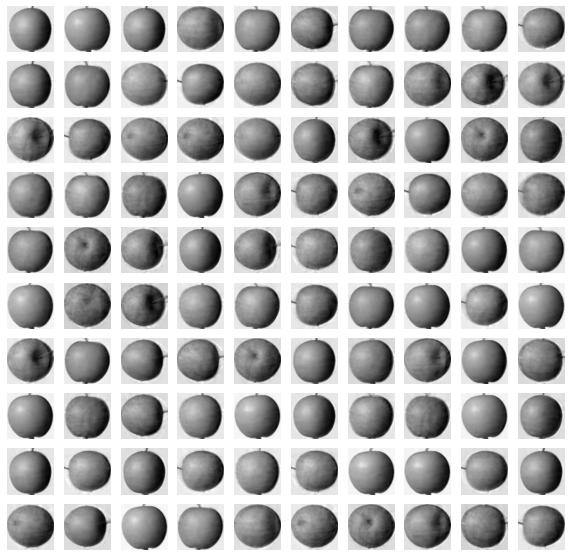

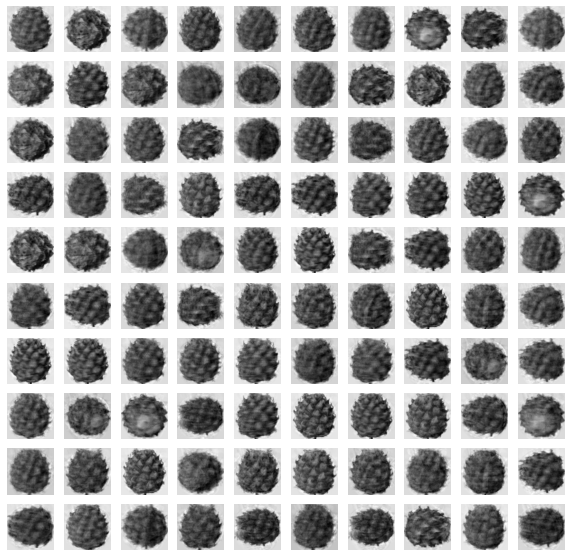

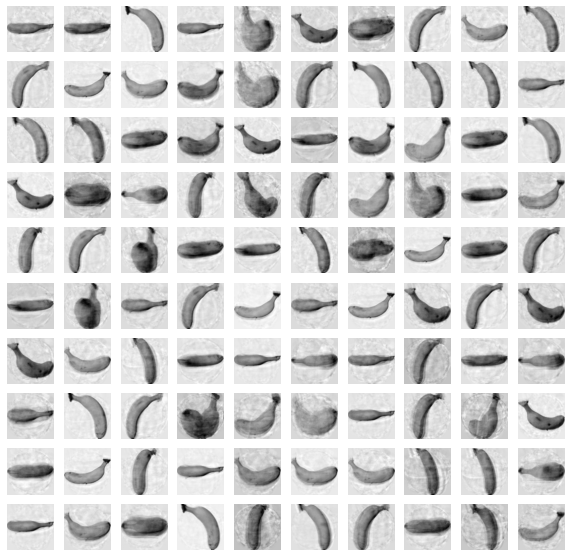

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start : start + 100])
  print('\n')

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9215454000471185


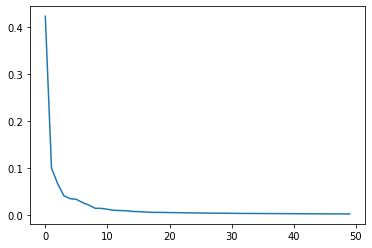

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [60]:
pca_2 = PCA(n_components = 3)
pca_2.fit(fruits_2d)

PCA(n_components=3)

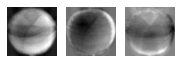

In [61]:
draw_fruits(pca_2.components_.reshape(-1, 100, 100))

In [62]:
fruits_pca_2 = pca_2.transform(fruits_2d)
print(fruits_pca_2.shape)

(300, 3)


In [63]:
fruits_inverse_2 = pca_2.inverse_transform(fruits_pca_2)
print(fruits_inverse_2.shape)

(300, 10000)


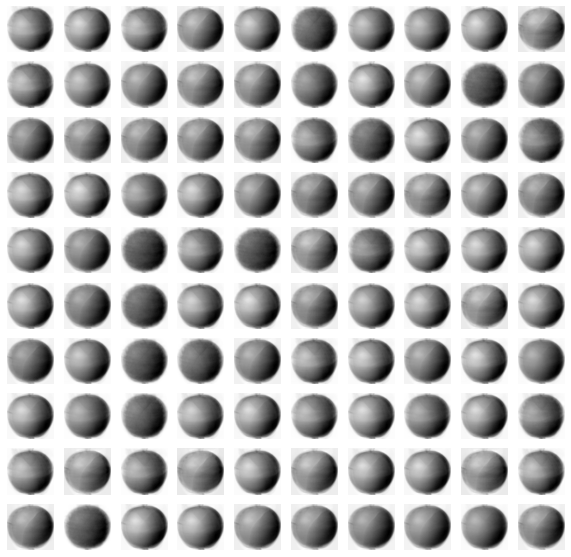

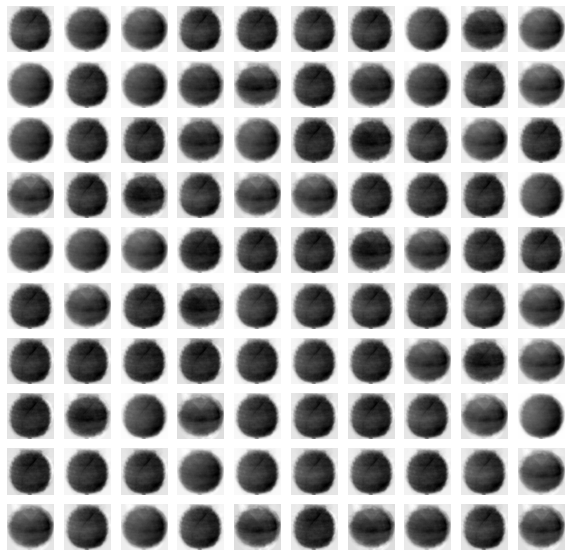

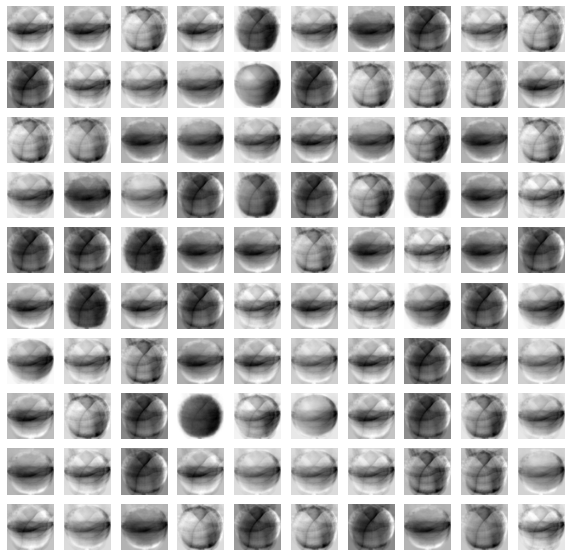

In [64]:
fruits_reconstruct_2 = fruits_inverse_2.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct_2[start : start + 100])
  print('\n')

In [65]:
print(np.sum(pca_2.explained_variance_ratio_))

0.5887663567832455


In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [67]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [68]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4070839881896973


In [69]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.038128662109375


In [70]:
scores = cross_validate(lr, fruits_pca_2, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9833333333333332
0.029628849029541014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [71]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [72]:
print(pca.n_components_)

2


In [73]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 19)

km.fit(fruits_pca_2)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


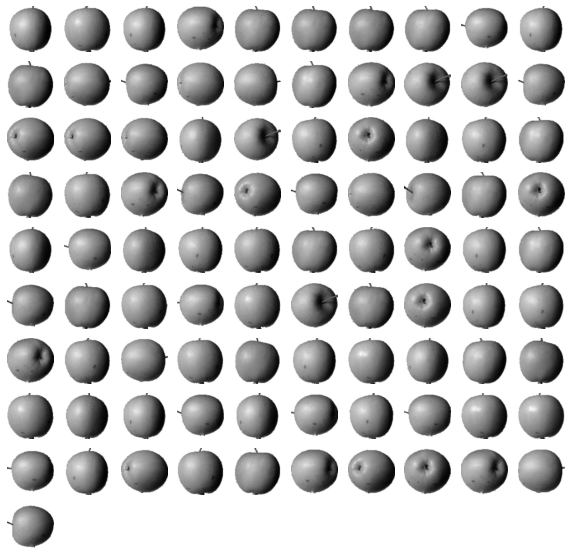

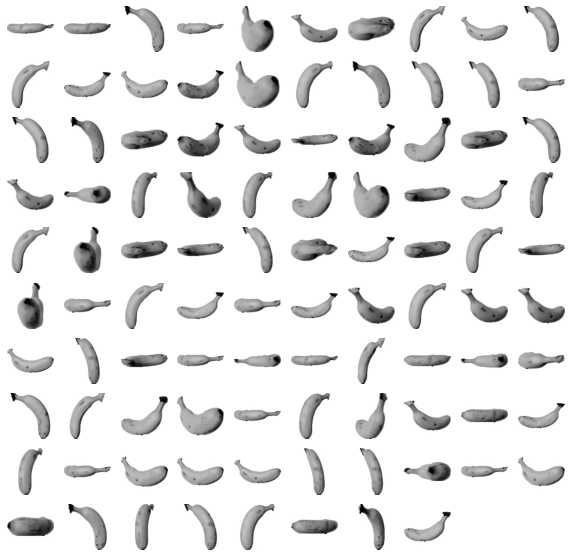

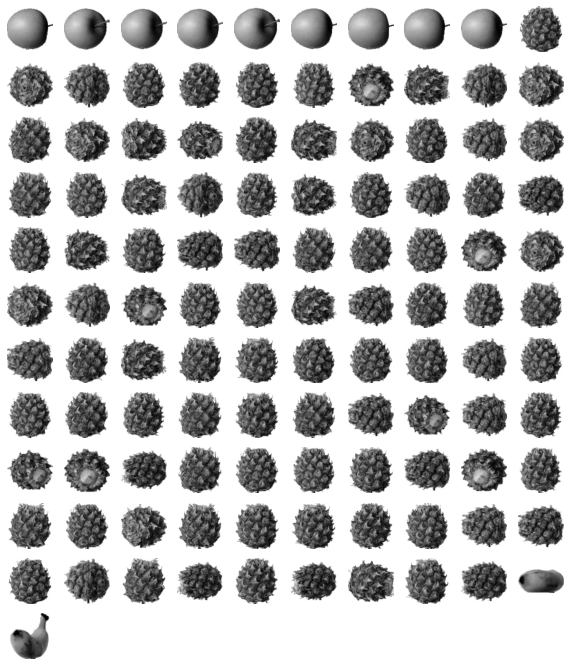

In [74]:
for label in range(0, 3) :
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

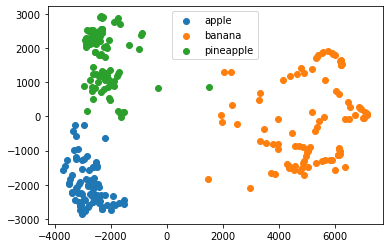

In [91]:
for label in range(0, 3) :
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[ : , 0], data[ : , 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

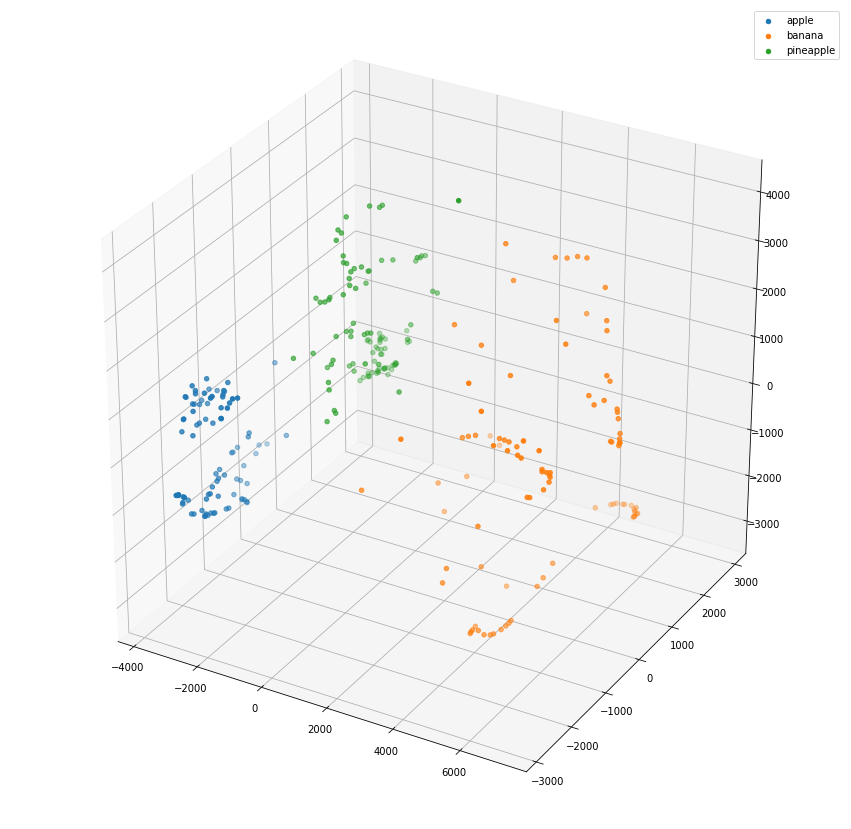

In [88]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
for label in range(0, 3) :
  data = fruits_pca[km.labels_ == label]
  ax.scatter(data[ : , 0], data[ : , 1], data[ : , 2])
ax.legend(['apple', 'banana', 'pineapple'])
plt.show()